## Bootcamp: Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 4: Modelado no supervisado en Machine Learning
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 4! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el caso y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

## Objetivos
- Diseñarás y aplicarás un modelo de *clustering*.
- Indicarás la cantidad óptima de grupos dado un conjunto que se te proporcionará.
- Generarás visualizaciones para *clustering* y método del codo.
- Usarás por lo menos un índice de desempeño para evaluar el modelo.


## Caso de estudio

Una empresa financiera tiene un nuevo producto dirigido a sus clientes con diferentes límites de crédito, por ello, es necesario dividir a los clientes en grupos más pequeños.

Desafortunadamente, los directivos no tienen idea de cuál es la cantidad óptima en la que se puede segregar a los clientes y cómo dirigir a nuevos clientes a esos grupos.

Es por eso que en este punto se te ha contratado. Para poder ejecutar tu trabajo te han compartido una base de datos que contiene las características que, según sus informes, son los más importantes para la aplicación de este programa. Consiste en seis puntos:
- **Salario mensual:** indica el ingreso mensual del cliente en pesos mexicanos.
- **Crédito tipo 1:** es un producto financiero que el cliente ha obtenido de la institución financiera; `1` significa que tiene este producto y `0` que no cuenta con él.
- **Crédito tipo 2:** es similar a las características del anterior; `1` significa que cuenta con el producto y `0` que no.
- **Límite de TC:** indica el límite de crédito de la tarjeta del cliente.
- **Años siendo cliente:** corresponde al tiempo que el cliente ha tenido una relación comercial con la institución financiera.
- **Previamente se ofreció el producto:** es la versión previa del producto e indica si el cliente se mostró interesado en obtenerlo (`1`) o no (`0`).

El archivo puede ser descargado aquí: https://drive.google.com/file/d/1wcjPCZPTMuDlyWcE1Do4-yqU5AglW_p9/view?usp=sharing

### Observaciones

El cliente requiere que le indiques la cantidad óptima de grupos en los que deberás catalogar a sus clientes. Para ello, usa el método del codo y grafícalo. Recuerda que tus clientes necesitan apoyos visuales.

Una vez que tengas la cantidad de grupos óptimos, deberás aplicar un método de *clustering*. El cliente solicita que le muestres gráficamente cómo están organizados los clientes. Para ello, usa una gráfica de dispersión o la que creas más conveniente.

Incluye, por lo menos, un índice de desempeño (*scoring*) para complementar tus análisis.

Tus visualizaciones deberán tener título y estar presentables. Puedes usar **Pyplot** o **Seaborn**.

Deberás escribir un texto explicando qué representa tu análisis. Usa un lenguaje que vaya dirigido a personas que no saben de ciencia de datos o matemáticas, esto es muy común en la realidad. Deberás hablar de tu gráfica, tus resultados y el manejo de la información, así como del beneficio de usar tu modelo.

Como reto adicional se te proprocionará un archivo en la liga siguiente: https://drive.google.com/file/d/1Nkoc-6AeC3Vzy7gfCNB_DlWTs4dXz7Ug/view?usp=sharing, la cual incluye 50 clientes más. Deberás aplicar el método que usaste para entrenar con tu primer modelo y aplicarlo en estos nuevos clientes. No olvides graficarlos (solo a los nuevos 50 clientes).


## Criterios de evaluación

Modelar el *clustering* correctamente:
- Determinar el número máximo de *clusters* y aplicar PCA (**2 puntos**).
- Hacer el diagrama de codo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Seleccionar y entrenar modelo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Generar la visualización de datos con un diseño personalizado y agregar títulos y leyendas (**2 puntos**).
- Evaluar el desempeño aplicado y explicar el modelo, la gráfica y el uso de datos a una persona que no es científica de datos (**2 puntos**). Si las explicaciones son dudosas, equivocadas o sin comentarios suficientes, solo tendrás **1 punto**.

**Punto extra**
- Si aplicas el mismo modelo que ya creaste en los nuevos 50 registros, obtendrás **1 punto** extra.
 **Nota:** No debes realizar un nuevo modelo, sino aplicar el ya hecho.
- Si estos nuevos 50 registros se agregan a los registros previos con los que diseñaste la primera gráfica, tendrás **1 punto** extra. Puedes diferenciarlos cambiándoles la forma, color o tamaño; así resaltarán más. Este punto no es válido si la grafica no tiene títulos, etiquetas y leyendas.

¡Éxito! Te vemos en el contenido del siguiente módulo.

### Carga de datos desde GitHub

In [60]:
import os
import requests
import pandas as pd
import base64
from io import StringIO
from dotenv import load_dotenv

# 1️⃣ Cargar las variables desde .env
load_dotenv()

# 2️⃣ Leer tu token de entorno
token = os.getenv("GITHUB_TOKEN")

# 3️⃣ Definir la URL de tu archivo (usando la API de GitHub)
url = "https://api.github.com/repos/apachecob/datascience/contents/costumers.csv"

# 4️⃣ Solicitar el archivo con autenticación
headers = {"Authorization": f"token {token}"}
response = requests.get(url, headers=headers)
response.raise_for_status()

# 5️⃣ Decodificar el contenido base64
content = base64.b64decode(response.json()["content"]).decode("utf-8")

# 6️⃣ Convertir a DataFrame
df = pd.read_csv(StringIO(content))
df.head()


,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,22572.91,1,0,30136.74,0.0,1
1,10609.64,1,1,53623.94,0.0,1
2,10079.48,0,1,18135.44,0.0,0
3,13871.35,1,0,30831.75,0.0,1
4,6541.46,0,1,20626.23,0.0,0


### Funciones

In [34]:
#  Función para shape, columns, info, describe, nulos y head
import pandas as pd

def resumen_df(df, filas=5):
    print("📐 Shape (filas, columnas):", df.shape)

    print("\n🧾 Columnas:")
    print(df.columns.tolist())

    print("\nℹ️ Info del DataFrame:")
    df.info()

    print("\n📊 Descripción estadística (include='all'):")
    display(df.describe(include="all").transpose())

    print("\n🚨 Valores nulos por columna:")
    display(df.isnull().sum())

    print(f"\n👀 Primeras {filas} filas:")
    display(df.head(filas))


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

def graficar_outliers(df, cols, filas=1, color_hist="lightgreen", color_box="salmon"):
    """
    Genera histogramas y boxplots para detectar outliers en varias columnas.

    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame con los datos.
    cols : list
        Lista de nombres de columnas numéricas a analizar.
    filas : int
        Número de filas de subplots (default=1). Si son muchas columnas, usa 2.
    color_hist : str
        Color del histograma.
    color_box : str
        Color del boxplot.
    """

    for col in cols:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        # Histograma con KDE
        sns.histplot(df[col], kde=True, ax=axes[0], color=color_hist)
        axes[0].set_title(f"Distribución de {col}")

        # Boxplot
        sns.boxplot(y=df[col], ax=axes[1], color=color_box)
        axes[1].set_title(f"Outliers en {col}")

        plt.tight_layout()
        plt.show()


In [36]:
def detectar_outliers_robustos(df, columnas):
    resultados = []
    for col in columnas:
        # --- IQR ---
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lim_inf = q1 - 1.5 * iqr
        lim_sup = q3 + 1.5 * iqr
        mask_iqr = (df[col] < lim_inf) | (df[col] > lim_sup)
        indices_iqr = df[mask_iqr].index.tolist()

        # --- Percentiles 5%-95% ---
        inf_p = np.percentile(df[col].dropna(), 5)
        sup_p = np.percentile(df[col].dropna(), 95)
        mask_per = (df[col] < inf_p) | (df[col] > sup_p)
        indices_per = df[mask_per].index.tolist()

        # --- Cambio promedio de percentiles ---
        percentiles = [x/100 for x in range(101)]
        desc = df[col].describe(percentiles=percentiles)
        diffs = desc.iloc[4:].diff()
        cambio_promedio = diffs.mean()
        # Banda superior e inferior
        banda_sup = max(desc["max"] - cambio_promedio, desc["99%"])
        banda_inf = min(desc["0%"] + cambio_promedio, desc["1%"])
        mask_cp = (df[col] < banda_inf) | (df[col] > banda_sup)
        indices_cp = df[mask_cp].index.tolist()

        # --- Combinar índices ---
        total_indices = set(indices_iqr) | set(indices_per) | set(indices_cp)

        # Guardar resultados
        resultados.append({
            "columna": col,
            "IQR_cant": len(indices_iqr),
            "IQR_%": round(len(indices_iqr)/len(df)*100,2),
            "Percentil_cant": len(indices_per),
            "Percentil_%": round(len(indices_per)/len(df)*100,2),
            "CambioProm_cant": len(indices_cp),
            "CambioProm_%": round(len(indices_cp)/len(df)*100,2),
            "Total_cant": len(total_indices),
            "Total_%": round(len(total_indices)/len(df)*100,2),
            "indices": list(total_indices)
        })

    return pd.DataFrame(resultados)


In [37]:
import pandas as pd
import numpy as np

# ======================
# Función auxiliar para unir índices de outliers
# ======================
def auxiliar_atipicos(lista_iqr, lista_per, lista_z):
    lista_iqr = set(lista_iqr)
    lista_per = set(lista_per)
    lista_z = set(lista_z)
    lista_iqr2 = lista_iqr.intersection(lista_per)
    lista_per2 = lista_per.intersection(lista_z)
    lista_z2 = lista_iqr.intersection(lista_z)
    indices_atipicos = list(set(list(lista_iqr2) + list(lista_per2) + list(lista_z2)))
    return indices_atipicos

# ======================
# Detectar outliers
# ======================
def detectar_outliers(df, columnas):
    resultados = pd.DataFrame()
    total_iqr, total_per, total_z, indices = [], [], [], []

    for col in columnas:
        # --- IQR ---
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        inf = q1 - 1.5 * iqr
        sup = q3 + 1.5 * iqr
        indices_iqr = list(df[(df[col] < inf) | (df[col] > sup)].index)
        total_iqr.append(len(indices_iqr))

        # --- Percentiles 5% y 95% ---
        INF_pe = np.percentile(df[col].dropna(), 5)
        SUP_pe = np.percentile(df[col].dropna(), 95)
        indices_per = list(df[(df[col] < INF_pe) | (df[col] > SUP_pe)].index)
        total_per.append(len(indices_per))

        # --- Cambio promedio entre percentiles ---
        percentiles = [x / 100 for x in range(100)]
        distribucion = df[col].describe(percentiles).iloc[4:]
        cambios = distribucion.diff()
        cambio_promedio = cambios.mean()
        if cambios["max"] > cambio_promedio:
            banda_sup = distribucion["max"] - cambio_promedio
            if banda_sup < distribucion["99%"]:
                banda_sup = distribucion["99%"]
        else:
            banda_sup = distribucion["max"]
        if cambios["1%"] > cambio_promedio:
            banda_inf = distribucion["0%"] + cambio_promedio
            if banda_inf > distribucion["1%"]:
                banda_inf = distribucion["1%"]
        else:
            banda_inf = distribucion["0%"]
        indices_z = list(df[(df[col] < banda_inf) | (df[col] > banda_sup)].index)
        total_z.append(len(indices_z))

        # --- Unir todos los índices ---
        indices.append(auxiliar_atipicos(indices_iqr, indices_per, indices_z))

    # --- Crear DataFrame de resultados ---
    resultados["columna"] = columnas
    resultados["outliers IQR"] = total_iqr
    resultados["outliers Percentil"] = total_per
    resultados["outliers Cambio Promedio"] = total_z
    resultados["indices"] = indices
    resultados["total_outliers"] = resultados["indices"].map(len)
    resultados["% outliers"] = round(resultados["total_outliers"] / df.shape[0] * 100, 2)

    return resultados

# ======================
# Tratar outliers según criterios
# ======================
def tratar_outliers(df, columnas, mostrar=True):
    df_result = detectar_outliers(df, columnas)

    ELIMINAR_UMBRAL = 2    # % a eliminar
    IMPUTAR_UMBRAL = 10    # % a limitar/imputar

    for _, row in df_result.iterrows():
        col = row["columna"]
        pct = row["% outliers"]
        df[col] = df[col].astype(float)  # asegurar float

        if pct < ELIMINAR_UMBRAL and len(row["indices"]) > 0:
            if mostrar:
                print(f"{col}: eliminando {len(row['indices'])} filas (pct {pct} < {ELIMINAR_UMBRAL}%)")
            df.drop(list(row["indices"]), inplace=True, errors="ignore")

        elif ELIMINAR_UMBRAL <= pct <= IMPUTAR_UMBRAL and len(row["indices"]) > 0:
            if mostrar:
                print(f"{col}: imputando/limitando outliers (pct {pct:.2f}%)")
            # Limitar valores usando IQR
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            inf = q1 - 1.5 * iqr
            sup = q3 + 1.5 * iqr
            df.loc[df[col] < inf, col] = inf
            df.loc[df[col] > sup, col] = sup

        else:
            if mostrar:
                print(f"{col}: sin cambios (pct {pct:.2f} > {IMPUTAR_UMBRAL}%)")

    return df

## EDA

### **Datos, Columnas, Nulos, Outliers, Tratamiento**

In [61]:
resumen_df(df)

📐 Shape (filas, columnas): (500, 6)

🧾 Columnas:
['Salario', 'Credito_tipo_1', 'Credito_tipo_2', 'Limite_TC', 'Tiempo_cliente', 'Producto_ofrecido']

ℹ️ Info del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            500 non-null    float64
 1   Credito_tipo_1     500 non-null    int64  
 2   Credito_tipo_2     500 non-null    int64  
 3   Limite_TC          500 non-null    float64
 4   Tiempo_cliente     500 non-null    float64
 5   Producto_ofrecido  500 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 23.6 KB

📊 Descripción estadística (include='all'):


,count,mean,std,min,25%,50%,75%,max
Salario,500.0,12089.09738,5123.700116,-2911.65,8534.350,11438.600,15171.4675,30041.40
Credito_tipo_1,500.0,0.61000,0.488238,0.00,0.000,1.000,1.0000,1.00
Credito_tipo_2,500.0,0.45800,0.498732,0.00,0.000,0.000,1.0000,1.00
Limite_TC,500.0,44784.55496,22150.923996,-22207.95,30096.285,47991.515,59108.1750,118636.82
Tiempo_cliente,500.0,4.32700,4.784776,0.00,0.000,0.000,8.4000,19.30
Producto_ofrecido,500.0,0.60200,0.489976,0.00,0.000,1.000,1.0000,1.00



🚨 Valores nulos por columna:


Salario              0
Credito_tipo_1       0
Credito_tipo_2       0
Limite_TC            0
Tiempo_cliente       0
Producto_ofrecido    0
dtype: int64


👀 Primeras 5 filas:


,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,22572.91,1,0,30136.74,0.0,1
1,10609.64,1,1,53623.94,0.0,1
2,10079.48,0,1,18135.44,0.0,0
3,13871.35,1,0,30831.75,0.0,1
4,6541.46,0,1,20626.23,0.0,0


Conclusiones preliminares:
- No se observan valores nulos
- La diferencia entre mínimos y máximos de las columnas "Salario" y "Limite_TC" son importantes
- Adicional al punto anterior, llama la atención la presencia de valores negativos en las columnas mencionadas **(estos deben ser tratados)**
- Tal como se menciona en el enunciado, se detectan columnas con valores booleanos ("Credito_tipo_1", "Credito_tipo_2", "Producto_ofrecido")
- La magnitud entre las columnas "Salario", "Limite_TC" y "Tiempo_cliente" es importante

### Revisión de valores negativos

In [62]:
# Contar y mostrar porcentaje de valores negativos
total_filas = len(df)

# Salario negativo
neg_salario = df[df['Salario'] < 0]
cant_salario_neg = len(neg_salario)
pct_salario_neg = (cant_salario_neg / total_filas) * 100

# Límite de TC negativo
neg_limite = df[df['Limite_TC'] < 0]
cant_limite_neg = len(neg_limite)
pct_limite_neg = (cant_limite_neg / total_filas) * 100

# Ambos negativos
ambos_neg = df[(df['Salario'] < 0) & (df['Limite_TC'] < 0)]
cant_ambos_neg = len(ambos_neg)
pct_ambos_neg = (cant_ambos_neg / total_filas) * 100

# Mostrar resultados
print(f"Salarios negativos: {cant_salario_neg} registros ({pct_salario_neg:.2f}%)")
print(f"Límites TC negativos: {cant_limite_neg} registros ({pct_limite_neg:.2f}%)")
print(f"Ambos negativos: {cant_ambos_neg} registros ({pct_ambos_neg:.2f}%)")

Salarios negativos: 1 registros (0.20%)
Límites TC negativos: 13 registros (2.60%)
Ambos negativos: 0 registros (0.00%)


Dado que la cantidad de filas con valores negativos representan un poco más del 2% del total y que en el caso del "Salario" y el "Limite_TC" los valores negativos no tienen sentido, estos registros se eliminarán para pasar a la revisión de outliers (valores atípicos o errores)

In [63]:
# Eliminar filas con salario o límite TC negativo
df_limpio = df[(df['Salario'] >= 0) & (df['Limite_TC'] >= 0)].copy()

# Verificar cuántos registros quedaron
print(f"Registros originales: {len(df)}")
print(f"Registros después de limpieza: {len(df_limpio)}")

Registros originales: 500
Registros después de limpieza: 486


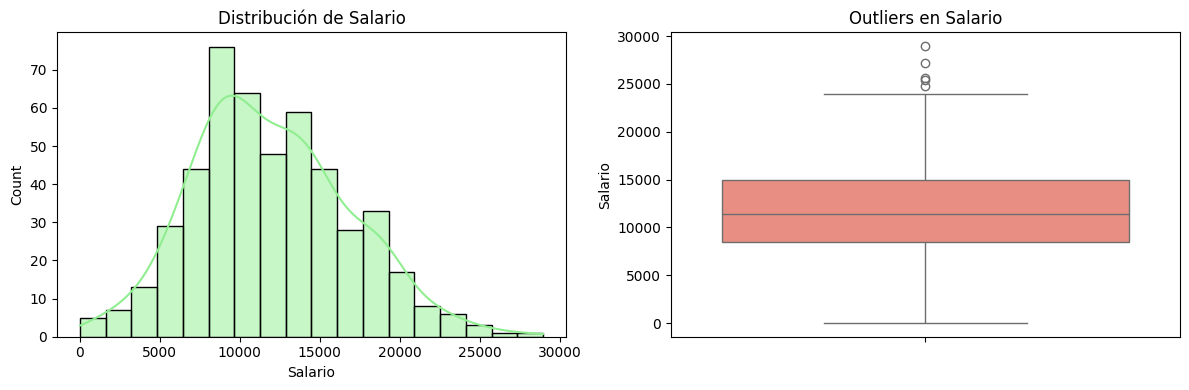

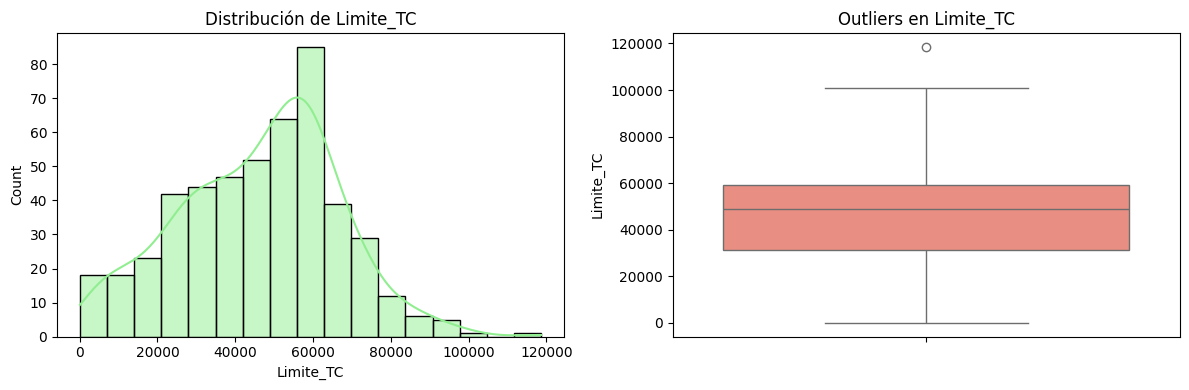

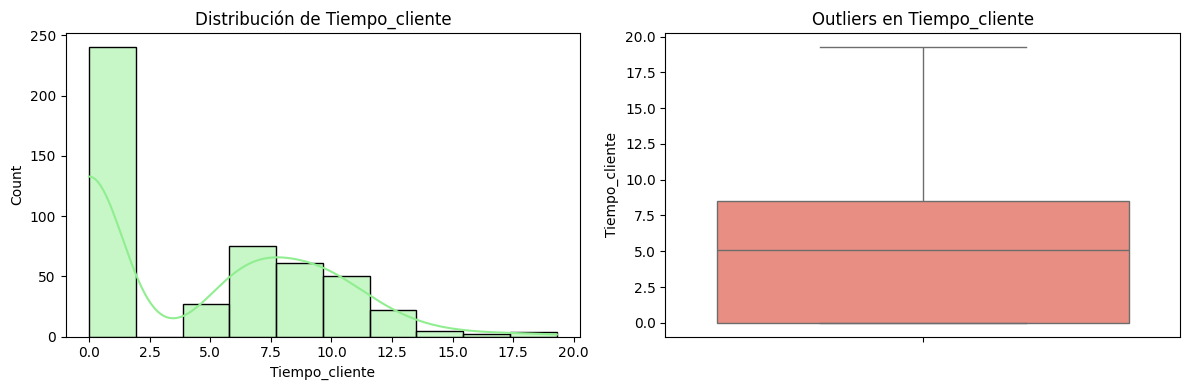

In [64]:
# Gráficos para análisis de Outliers

# Outliers
cols = ["Salario", "Limite_TC", "Tiempo_cliente"]
graficar_outliers(df_limpio, cols)

In [65]:
# Outliers - Tabulados
columnas_numericas = df_limpio.select_dtypes(include=['int64', 'float64']).columns

# Detectamos outliers primero
outliers_info = detectar_outliers_robustos(df_limpio, columnas_numericas)

# Mostrar resumen completo
display(outliers_info)


,columna,IQR_cant,IQR_%,Percentil_cant,Percentil_%,CambioProm_cant,CambioProm_%,Total_cant,Total_%,indices
0,Salario,5,1.03,50,10.29,3,0.62,50,10.29,"[0, 266, 11, 140, 13, 398, 17, 146, 277, 23, 2..."
1,Credito_tipo_1,0,0.00,0,0.00,0,0.00,0,0.00,[]
2,Credito_tipo_2,0,0.00,0,0.00,0,0.00,0,0.00,[]
3,Limite_TC,1,0.21,50,10.29,2,0.41,50,10.29,"[256, 384, 387, 388, 392, 10, 266, 396, 141, 2..."
4,Tiempo_cliente,0,0.00,25,5.14,1,0.21,25,5.14,"[256, 320, 5, 6, 71, 141, 333, 461, 81, 339, 2..."
5,Producto_ofrecido,0,0.00,0,0.00,0,0.00,0,0.00,[]


### **Análisis y tratamiento de valores atípicos**

Durante el análisis exploratorio de los datos, se identificaron inicialmente **valores negativos** en las variables *Salario* y *Límite de TC*. Dado que en el contexto financiero un cliente no puede tener un salario o un límite de crédito negativo, estos registros se consideraron **errores de registro** y fueron eliminados. En total, se removieron **14 observaciones** (2.8% del total), lo cual es un porcentaje mínimo y no compromete la representatividad de la muestra.

Posteriormente, se realizó un análisis detallado de los **valores extremos restantes** (por ejemplo, salarios superiores a 25,000 pesos o límites de crédito cercanos a 120,000 pesos). Para ello, se utilizaron tres métodos complementarios:
- **Rango intercuartílico (IQR)**
- **Percentiles 5% y 95%**
- **Cambio promedio entre percentiles**

Los resultados mostraron que, aunque existen valores clasificados como *outliers* por estos criterios, **corresponden a clientes reales y plausibles**: personas con ingresos elevados, límites de crédito altos o larga antigüedad en la institución. Estos perfiles son especialmente relevantes para el negocio, ya que podrían representar segmentos de alto valor (como clientes premium).

Por esta razón, y considerando que el objetivo del proyecto es **segmentar a todos los clientes actuales** (no solo a los “promedio”), se decidió **no eliminar ni transformar estos valores extremos**. En su lugar, se aplicará un **escalado estandarizado** en la siguiente etapa del modelado, lo que permitirá que el algoritmo de clustering (K-Means) no se vea sesgado por las diferencias de magnitud entre variables.

### Escalado

Antes de aplicar los algoritmos de **K-Means** y **PCA**, se realizó un proceso de **estandarización** de las variables mediante el método **StandardScaler**, el cual transforma los datos para que cada característica tenga una media igual a 0 y una desviación estándar igual a 1.  
Este procedimiento garantiza que todas las variables contribuyan de manera equitativa al proceso de agrupamiento, evitando que aquellas con escalas mayores dominen el análisis.

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# 1) Asegura índice consecutivo
df_limpio = df_limpio.reset_index(drop=True)

# 2) Escalar y entrenar sobre EXACTAMENTE el mismo df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_limpio)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 3) Asignar etiquetas en df_limpio (486 filas)
df_limpio['cluster'] = labels


In [67]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            486 non-null    float64
 1   Credito_tipo_1     486 non-null    int64  
 2   Credito_tipo_2     486 non-null    int64  
 3   Limite_TC          486 non-null    float64
 4   Tiempo_cliente     486 non-null    float64
 5   Producto_ofrecido  486 non-null    int64  
 6   cluster            486 non-null    int32  
dtypes: float64(3), int32(1), int64(3)
memory usage: 24.8 KB


### Método del codo

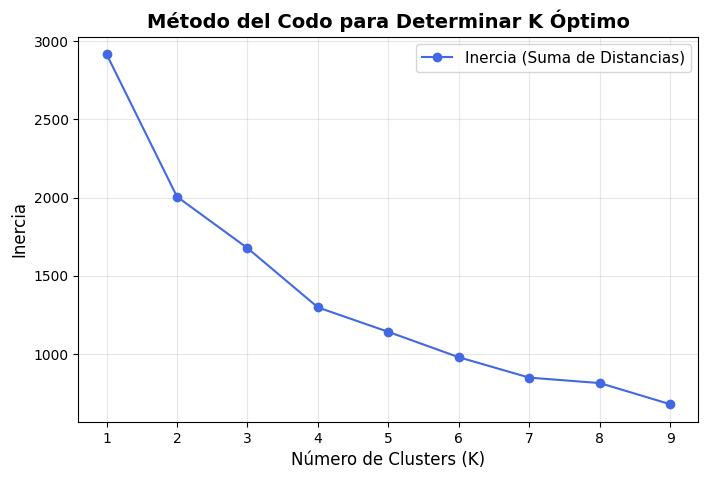

In [68]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

# Gráfico mejorado
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'o-', color='royalblue', label='Inercia (Suma de Distancias)')
plt.title('Método del Codo para Determinar K Óptimo', fontsize=14, fontweight='bold')
plt.xlabel('Número de Clusters (K)', fontsize=12)
plt.ylabel('Inercia', fontsize=12)
plt.xticks(K)
plt.grid(alpha=0.3)
plt.legend(loc='best', fontsize=11)
plt.show()


Según el gráfico del método del codo, se observa un punto de inflexión en **K = 4**, donde la reducción de la inercia comienza a ser menos significativa.  
Por este motivo, se selecciona **K = 4** como el número óptimo de clusters para continuar con el análisis.


### KMeans

In [69]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_limpio['cluster'] = kmeans.fit_predict(X_scaled)

df_limpio.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,cluster
0,22572.91,1,0,30136.74,0.0,1,3
1,10609.64,1,1,53623.94,0.0,1,1
2,10079.48,0,1,18135.44,0.0,0,2
3,13871.35,1,0,30831.75,0.0,1,3
4,6541.46,0,1,20626.23,0.0,0,2


In [70]:
df_limpio['cluster'].value_counts()

cluster
0    145
3    122
1    119
2    100
Name: count, dtype: int64

Se aplicó el algoritmo **K-Means** con **K = 4**, asignando a cada cliente un número de cluster según la similitud de sus características.  
La distribución resultante muestra que los grupos son de tamaños relativamente equilibrados, lo que indica una segmentación adecuada de la base de clientes.



### Análisis de componentes principales (PCA)


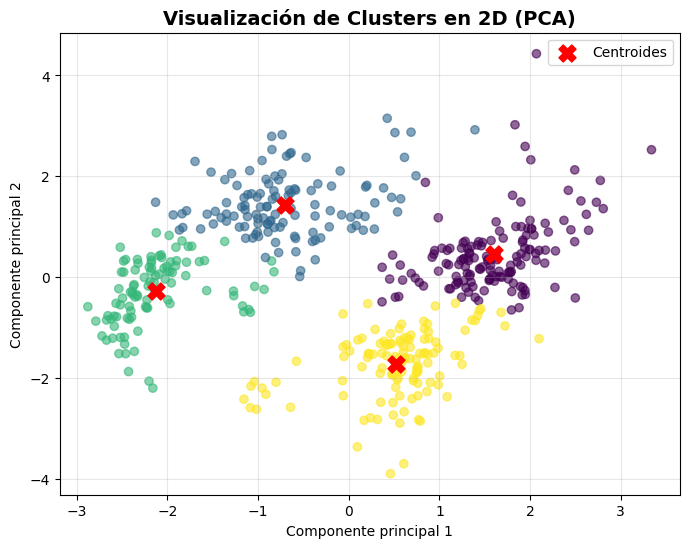

In [71]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# === PCA a 2 componentes ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# === DataFrame con resultados y clusters ===
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = df_limpio['cluster']

# === Calcular centroides proyectados al plano PCA ===
centroides_orig = kmeans.cluster_centers_
centroides_pca = pca.transform(centroides_orig)

# === Gráfico PCA con centroides ===
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['cluster'], cmap='viridis', alpha=0.6)
plt.scatter(centroides_pca[:,0], centroides_pca[:,1], 
            c='red', marker='X', s=150, label='Centroides')
plt.title('Visualización de Clusters en 2D (PCA)', fontsize=14, fontweight='bold')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [72]:
# Promedios de las variables numéricas por cluster
cluster_summary = df_limpio.groupby('cluster')[['Salario', 'Limite_TC', 'Tiempo_cliente']].mean().round(2)

# Conteo de productos y tipos de crédito por cluster
cluster_products = df_limpio.groupby('cluster')[['Credito_tipo_1', 'Credito_tipo_2', 'Producto_ofrecido']].sum()

# Combinar todo en una sola tabla resumen
summary = pd.concat([cluster_summary, cluster_products], axis=1)
summary


,Salario,Limite_TC,Tiempo_cliente,Credito_tipo_1,Credito_tipo_2,Producto_ofrecido
cluster,,,,,,
0,11971.04,64837.90,8.72,141,3,79
1,8621.49,56653.30,6.49,39,119,102
2,9666.08,23665.67,0.19,10,100,46
3,17090.38,32095.05,0.88,110,0,70


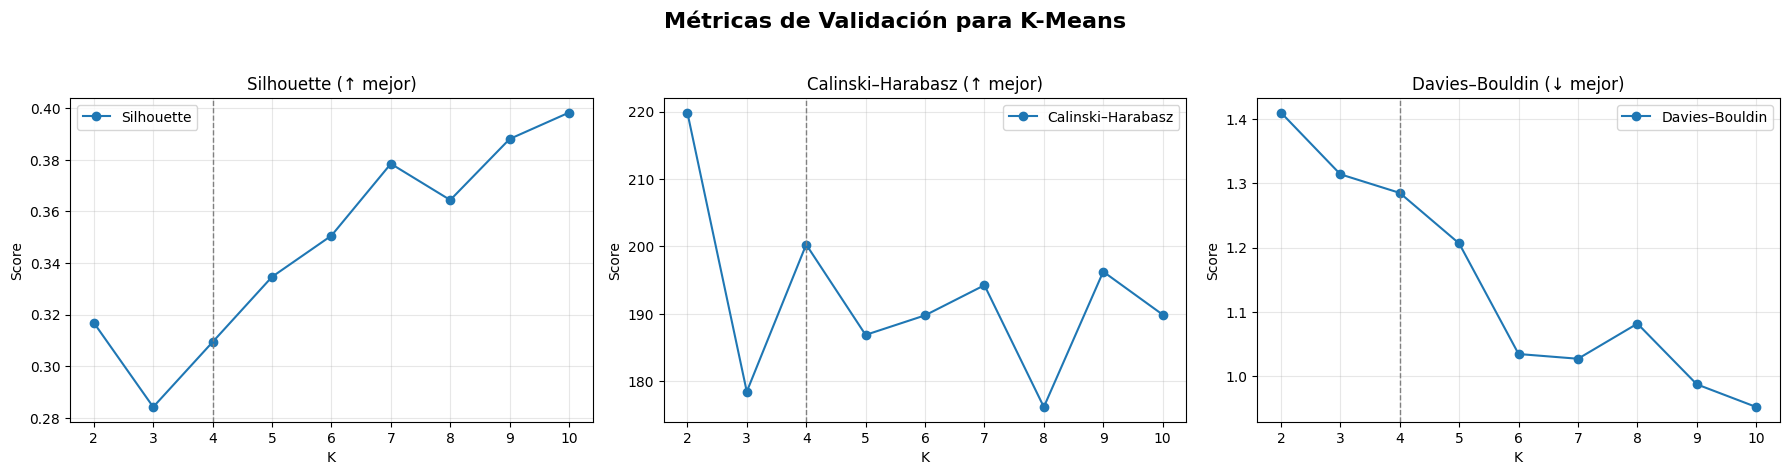

Silhouette @K=4: 0.309
Calinski–Harabasz @K=4: 200.259
Davies–Bouldin @K=4: 1.285


In [73]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt

# --- Configuración ---
K_range = range(2, 11)   # Silhouette no está definido para K=1
random_state = 42

sil_vals, ch_vals, db_vals = [], [], []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=random_state)
    labels = km.fit_predict(X_scaled)          # X_scaled: tus datos estandarizados
    sil_vals.append(silhouette_score(X_scaled, labels))
    ch_vals.append(calinski_harabasz_score(X_scaled, labels))
    db_vals.append(davies_bouldin_score(X_scaled, labels))

# --- Gráficos: 1 fila x 3 columnas ---
fig, axes = plt.subplots(1, 3, figsize=(18, 4.8))
fig.suptitle('Métricas de Validación para K-Means', fontsize=16, fontweight='bold')

# Silhouette (↑ mejor)
axes[0].plot(list(K_range), sil_vals, 'o-', label='Silhouette')
axes[0].axvline(4, color='gray', linestyle='--', linewidth=1)
axes[0].set_title('Silhouette (↑ mejor)')
axes[0].set_xlabel('K'); axes[0].set_ylabel('Score')
axes[0].set_xticks(list(K_range))
axes[0].grid(alpha=0.3); axes[0].legend()

# Calinski–Harabasz (↑ mejor)
axes[1].plot(list(K_range), ch_vals, 'o-', label='Calinski–Harabasz')
axes[1].axvline(4, color='gray', linestyle='--', linewidth=1)
axes[1].set_title('Calinski–Harabasz (↑ mejor)')
axes[1].set_xlabel('K'); axes[1].set_ylabel('Score')
axes[1].set_xticks(list(K_range))
axes[1].grid(alpha=0.3); axes[1].legend()

# Davies–Bouldin (↓ mejor)
axes[2].plot(list(K_range), db_vals, 'o-', label='Davies–Bouldin')
axes[2].axvline(4, color='gray', linestyle='--', linewidth=1)
axes[2].set_title('Davies–Bouldin (↓ mejor)')
axes[2].set_xlabel('K'); axes[2].set_ylabel('Score')
axes[2].set_xticks(list(K_range))
axes[2].grid(alpha=0.3); axes[2].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Reporte numérico en K=4
k_index = list(K_range).index(4)
print(f"Silhouette @K=4: {sil_vals[k_index]:.3f}")
print(f"Calinski–Harabasz @K=4: {ch_vals[k_index]:.3f}")
print(f"Davies–Bouldin @K=4: {db_vals[k_index]:.3f}")


## RESULTADO

Se analizaron los datos de los clientes y se agruparon en **cuatro grupos principales**, según las características que comparten entre sí.  
Cada punto del gráfico representa a un cliente, y los colores muestran a qué grupo pertenece.  
Los símbolos rojos marcan el centro de cada grupo, es decir, el punto que mejor representa a los clientes con características parecidas.

A continuación se resumen las principales diferencias entre los grupos:

- **Grupo 0:** Clientes con ingresos medios, límites de crédito altos y mayor tiempo como clientes. Representan a personas con una relación estable y consolidada con la institución.  
- **Grupo 1:** Clientes con límites de crédito altos, varios productos contratados y uso frecuente del segundo tipo de crédito.  
- **Grupo 2:** Clientes muy nuevos, con límites de crédito más bajos y una mayor presencia del segundo tipo de crédito.  
- **Grupo 3:** Clientes con los ingresos más altos, menor tiempo en la institución y preferencia por el primer tipo de crédito.

Al evaluar el rendimiento del modelo con diferentes números de grupos, se observó que **cuatro grupos** ofrecen un equilibrio adecuado entre calidad, claridad y facilidad de interpretación.  
Además, este número coincide con el punto óptimo detectado en el **método del codo**, lo que confirma que **K = 4** es una buena elección para representar correctamente los distintos tipos de clientes.


### Aplicación de Modelo entrenado sobre nuevos 50 nuevo registros

In [74]:
import os
import requests
import pandas as pd
import base64
from io import StringIO
from dotenv import load_dotenv

# 1️⃣ Cargar las variables desde .env
load_dotenv()

# 2️⃣ Leer tu token de entorno
token = os.getenv("GITHUB_TOKEN")

# 3️⃣ Definir la URL de tu archivo (usando la API de GitHub)
url = "https://api.github.com/repos/apachecob/datascience/contents/new_costumer.csv"

# 4️⃣ Solicitar el archivo con autenticación
headers = {"Authorization": f"token {token}"}
response = requests.get(url, headers=headers)
response.raise_for_status()

# 5️⃣ Decodificar el contenido base64
content = base64.b64decode(response.json()["content"]).decode("utf-8")

# 6️⃣ Convertir a DataFrame
df2 = pd.read_csv(StringIO(content))
df2.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Tipo_de_cliente
0,19028.02,1,0,18845.91,0.0,1,3
1,17004.81,1,0,16421.36,0.0,0,2
2,12973.54,1,0,57295.44,9.6,1,2
3,13995.43,0,0,23556.17,7.7,0,3
4,13155.66,0,1,61073.59,10.2,1,0


Se agrega la columna "Tipo_de_cliente" en este nuevo dataset

In [75]:
df2['Tipo_de_cliente'].value_counts()

Tipo_de_cliente
1    14
0    14
2    11
3    11
Name: count, dtype: int64

Al agregar nuevas columnas (como 'Tipo_de_cliente'), se genera un error porque el modelo espera exactamente las mismas columnas con las que fue entrenado originalmente. Por ello, se eliminan las columnas adicionales y se reordena el DataFrame para conservar solo las variables utilizadas durante el entrenamiento.

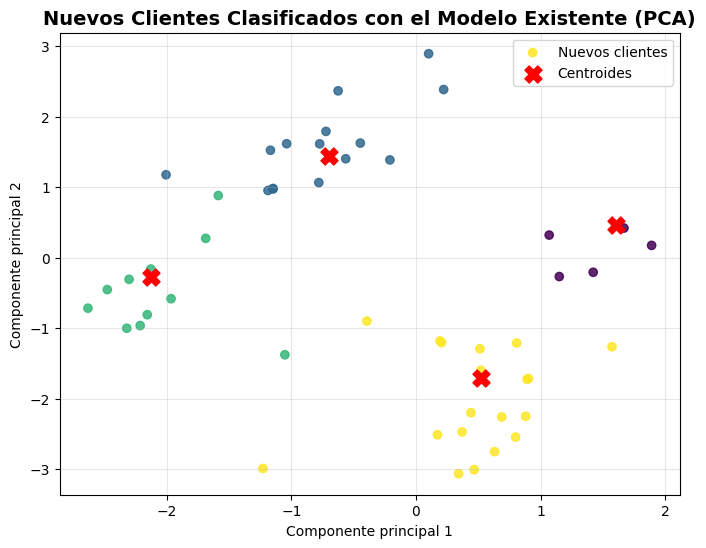

cluster
3    19
1    15
2    11
0     5
Name: Nuevos por cluster, dtype: int64

In [76]:
# === 1) Columnas usadas en el entrenamiento ===
feature_cols = ['Salario','Credito_tipo_1','Credito_tipo_2','Limite_TC','Tiempo_cliente','Producto_ofrecido']

# === 2) Quitar columnas extra y asegurar mismo orden ===
df2 = df2.drop(columns=['Tipo_de_cliente'], errors='ignore')
df2 = df2.reindex(columns=feature_cols)

# === 3) Tipos numéricos + imputación con medias del set original ===
for c in feature_cols:
    df2[c] = pd.to_numeric(df2[c], errors='coerce')

train_means = df[feature_cols].mean()   # df = dataset original usado para entrenar
df2 = df2.fillna(train_means)

# === 4) Mismo scaler y mismo modelo (no reentrenar) ===
X_df2_scaled = scaler.transform(df2[feature_cols])
df2['cluster'] = kmeans.predict(X_df2_scaled)

# === 5) Proyección al mismo PCA y gráfico SOLO con los nuevos ===
X_df2_pca = pca.transform(X_df2_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_df2_pca[:,0], X_df2_pca[:,1],
            c=df2['cluster'], cmap='viridis', alpha=0.85, label='Nuevos clientes')
plt.scatter(centroides_pca[:,0], centroides_pca[:,1],
            c='red', marker='X', s=150, label='Centroides')
plt.title('Nuevos Clientes Clasificados con el Modelo Existente (PCA)', fontsize=14, fontweight='bold')
plt.xlabel('Componente principal 1'); plt.ylabel('Componente principal 2')
plt.legend(); plt.grid(alpha=0.3); plt.show()

# (Opcional) Resumen rápido de estos 50 clientes por cluster
display(df2['cluster'].value_counts().rename('Nuevos por cluster'))

## Aplicación del modelo a nuevos clientes

El modelo previamente entrenado se aplicó a un conjunto adicional de **50 nuevos clientes**, utilizando exactamente los mismos parámetros y proceso de estandarización empleados en la fase inicial.  
De esta forma, se garantizó la **consistencia en la clasificación** y la **comparabilidad con los grupos originales**.

Los resultados muestran la siguiente distribución de los nuevos clientes entre los clusters existentes:

- **Cluster 3:** 19 clientes  
- **Cluster 1:** 15 clientes  
- **Cluster 2:** 11 clientes  
- **Cluster 0:** 5 clientes  

La mayor concentración de nuevos registros se observa en los **Clusters 3 y 1**, lo que sugiere que los perfiles más comunes entre los nuevos clientes corresponden a **personas con ingresos medios a altos, límites de crédito moderados y una combinación equilibrada de productos financieros**.  
Esta distribución indica que el modelo mantiene su **coherencia y capacidad de generalización**, identificando patrones consistentes incluso al incorporar nuevos datos sin requerir reentrenamiento.
